In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_wine

In [6]:
d = load_wine()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
df['class'] = d['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
x = df.iloc[ :, :-1]
Y = df.iloc[ :, -1]
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int32

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [16]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), activation='relu', solver='adam')
model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50))

In [17]:
ypred = model.predict(x_test)
ypred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2])

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, ypred))

0.9777777777777777


In [19]:
confusion_matrix(y_test, ypred)

array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]], dtype=int64)

In [20]:
clf = MLPClassifier()
m = [100,200,250]
s = ['sgd', 'adam']
a1=['tanh','logistic','relu']
a2=[0.0001,0.05,0.10]
param_grid = {'max_iter':m, 'solver':s, 'activation':a1,'alpha': a2}
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(x_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'logistic', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'max_iter': [100, 200, 250],
                         'solver': ['sgd', 'adam']})

In [21]:
grid.best_params_

{'activation': 'tanh', 'alpha': 0.0001, 'max_iter': 200, 'solver': 'adam'}

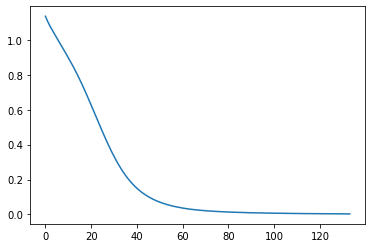

In [22]:
plt.plot(model.loss_curve_)

In [23]:
accuracy_score(y_test, grid.best_estimator_.predict(x_test))

0.9555555555555556

In [25]:
from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier()
rmodel.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
accuracy_score(rmodel.predict(x_test), y_test)

1.0

In [27]:
rmodel.feature_importances_

array([0.11845221, 0.02680728, 0.01868588, 0.02305612, 0.02490928,
       0.06985948, 0.14490843, 0.01678472, 0.01850671, 0.17795585,
       0.08227022, 0.12715367, 0.15065016])